In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [3]:
train = pd.read_csv("train.csv")

### Gameplan

- Prepare data
    - impute missing values
    - Feature Extraction
        - one hot encode categorical variables
            - MSSubClass
            - MSZoning
            - Street	
            - Alley
            - LotShape
            - LandContour
            - Utilities
            - LotConfig
            - LandSlope
            - Neighborhood
            - Condition1
            - Condition2
            - BldgType
            - HouseStyle
            - RoofStyle
            - RoofMatl
            - Exterior1st
            - Exterior2nd
            - MasVnrType
            - Foundation
            - PavedDrive
            - MiscFeature
            - SaleType
            - SaleCondition

        - Convert to Numbers
            - CentralAir

        - Convert the following two from categorical variables to ordinal. e.g. excellent = 5; poor = 1
            - ExterQual
            - ExterCond
            - BsmtQual
            - BsmtCond
            - BsmtExposure
            - BsmtFinType1
            - HeatingQC
            - Electrical
            - KitchenQual
            - Functional
            - FireplaceQu
            - GarageQual
            - GarageCond
            - PoolQC
            - Fence

- Explore dataset
- Split data into feature matrix and target array
- Start off with a linear regression
- Opportunities to practice creative feature engineering 
- Try out advanced regression techniques like random forest and gradient boosting
- Will need to consider PCA or other dimensionality reduction techniques to drop the number of features in use

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Understand our data

#### Missing Data

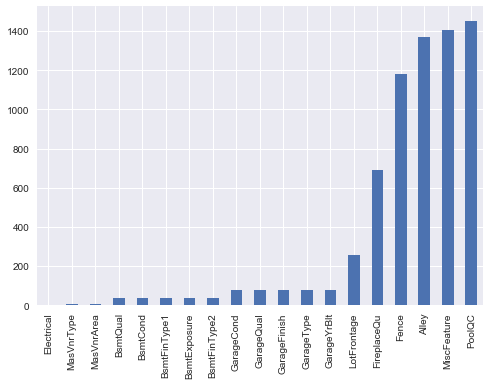

In [5]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot(kind='bar')

#### Let's look at the type of each dataset

In [6]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']

quantitative.remove('Id')
quantitative.remove('SalePrice')

#### Test for normality in SalePrice the dependent variable

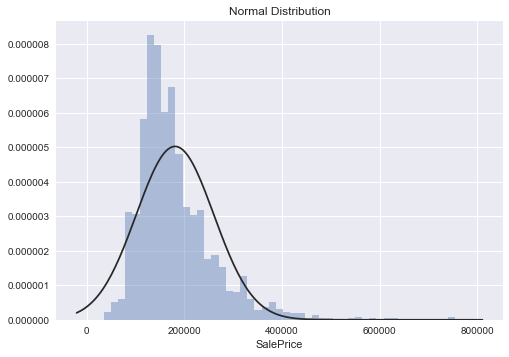

In [7]:
import scipy.stats as st

plt.figure()
plt.title('Normal Distribution')
sns.distplot(train.SalePrice, kde=False, fit=st.norm)

SalePrice is not normally distributed. Assumption of normal distribution must be met for linear regression. Let's check this with a Kolmogorov-Smirnov Test (K-S Test) for Normality.

In [8]:
from scipy.stats import kstest
kstest(train.SalePrice, st.norm.cdf, args = (train.SalePrice.mean(), train.SalePrice.std()))

KstestResult(statistic=0.12368542719946385, pvalue=0.0)

The null hypothesis for the K-S Test is that the data follows the normal distribution. The alternative hypothesis is that the data does not follow the normal distribution. Employing an alpha value of 0.05, we have sufficient evidence to reject the null hypothesis.

#### Transforming the variable

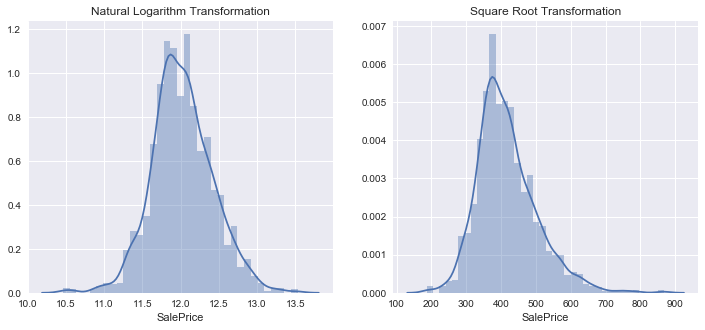

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.set_title('Natural Logarithm Transformation')
sns.distplot(np.log(train.SalePrice), ax=ax1)

ax2.set_title('Square Root Transformation')
sns.distplot(np.sqrt(train.SalePrice), ax=ax2)

Compute K-S Test for Both Transformed SalePrices

In [10]:
kstest(np.log(train.SalePrice), st.norm.cdf, args = (np.log(train.SalePrice).mean(), np.log(train.SalePrice).std()))

# kstest(np.sqrt(train.SalePrice), st.norm.cdf, args = (np.sqrt(train.SalePrice).mean(), np.sqrt(train.SalePrice).std()))

# print (kstest(np.log(train.SalePrice), 'norm'))
# print (kstest(np.sqrt(train.SalePrice), 'norm'))

KstestResult(statistic=0.040910076749580582, pvalue=0.014665968087462122)